# System Identification With Python

I need to analyse some data. This is part of that analysis.

## Part 1: Generate Fake Data

To identify data we need to have some known data to identify.

In [16]:
import random
# Parallel Path
from scipy import signal
import numpy as np
import matplotlib

plt = matplotlib.pyplot

%matplotlib inline

In [23]:
def sine(t=None, amplitude=1, frequency=1, phase=0):
    return amplitude*np.sin(2*np.pi*frequency*t+phase)

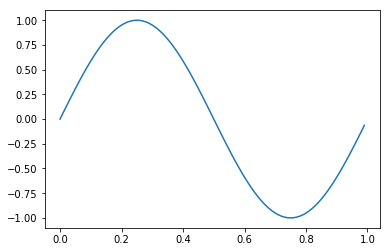

In [25]:
t=np.arange(0, 1, 0.01)
y = sine(t)
plt.plot(t, y)

In [26]:
from scipy.fftpack import fft

In [27]:
t=np.arange(0, 100, 0.01)
y = sine(t)

/projects/python_SystemID/venv/lib/python3.5/site-packages/ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


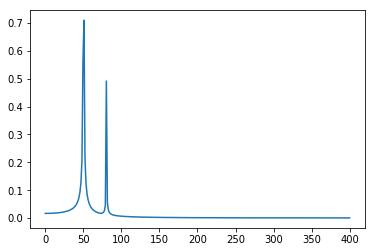

In [29]:
## Working Example from Stack Overflow.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [31]:
t[1]

0.01

In [35]:
np.fft.fftfreq(len(t), t[1] - t[0])

array([ 0.  ,  0.01,  0.02, ..., -0.03, -0.02, -0.01])

In [36]:
Y = np.fft.fft(y)

In [37]:
Y

array([  5.01874111e+00 +0.00000000e+00j,
         5.02225132e+00 +1.82513100e-02j,
         5.03281167e+00 +3.66003826e-02j,
         5.05051196e+00 +5.51464880e-02j,
         5.07550400e+00 +7.39919578e-02j,
         5.10800492e+00 +9.32438355e-02j,
         5.14830193e+00 +1.13015676e-01j,
         5.19675891e+00 +1.33429560e-01j,
         5.25382487e+00 +1.54618391e-01j,
         5.32004482e+00 +1.76728575e-01j,
         5.39607361e+00 +1.99923191e-01j,
         5.48269321e+00 +2.24385797e-01j,
         5.58083459e+00 +2.50325064e-01j,
         5.69160519e+00 +2.77980487e-01j,
         5.81632388e+00 +3.07629499e-01j,
         5.95656529e+00 +3.39596440e-01j,
         6.11421699e+00 +3.74263994e-01j,
         6.29155338e+00 +4.12087934e-01j,
         6.49133260e+00 +4.53616393e-01j,
         6.71692495e+00 +4.99515348e-01j,
         6.97248531e+00 +5.50602829e-01j,
         7.26318819e+00 +6.07895550e-01j,
         7.59555366e+00 +6.72673554e-01j,
         7.97790757e+00 +7.4657156

##  First Order System

In [8]:
K = 1
tau = 1
dT = 1e-2

In [9]:
sys2 = signal.lti(K, [tau, 1])
sys2

TransferFunctionContinuous(
array([ 1.]),
array([ 1.,  1.]),
dt: None
)

In [10]:
T = np.arange(0, tau*10, dT)

In [11]:
T2b, Y2b = signal.step2(sys2, T=T)

In [12]:
import matplotlib
%matplotlib inline

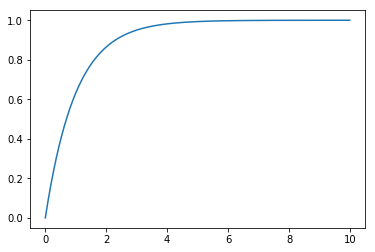

In [13]:
matplotlib.pyplot.plot(T2b,Y2b)

### Part 2: Analyze Fake Data

In [34]:
def stepID1(T, X, Y):
    X_0 = X[0]
    X_final = X[-1]

    Y_0 = Y[0]
    Y_final = Y[-1]
    tau_est = list()

    K_est = (Y_final-Y_0) / (X_final - X_0)

    for i in range(1,4):
        Y_ = (1-np.exp(-i))*(Y_final-Y_0)
        idx1 = np.where(Y_>=Y1)[0][-1]
        idx2 = np.where(Y_<=Y1)[0][0]

        tau_est.append(T[idx1]/i)
        tau_est.append(T[idx2]/i)
    #print(tau_est)
    tau_est = np.mean(tau_est)

    return K_est, tau_est

In [35]:
stepID1(T, X, Y1)

IndexError: index 159956 is out of bounds for axis 0 with size 125664

In [32]:
T_, Y_, xout = signal.lsim(sys2, U=Y, T=T, X0=X[0])

In [33]:
plot = matplotlib.pyplot.plot

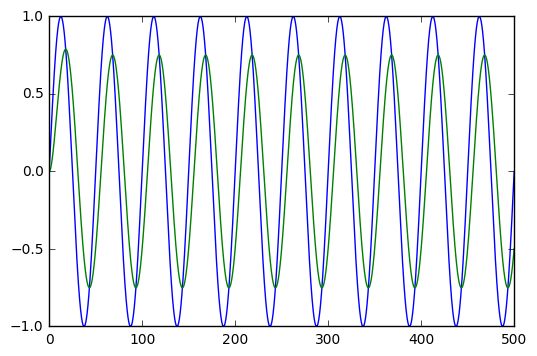

In [29]:
cycles = 10 # Number of cycles to generate
f=2*10e-3 # Hz

T=np.arange(0,cycles/f,1e-2)
w = 2*np.pi*f
Y=np.sin(w*T)
T_, Y_, xout = signal.lsim(sys2, U=Y, T=T, X0=Y[0])
plot(T,Y,T_,Y_)

In [30]:
t0=np.where(8/f<=T)[0][0]

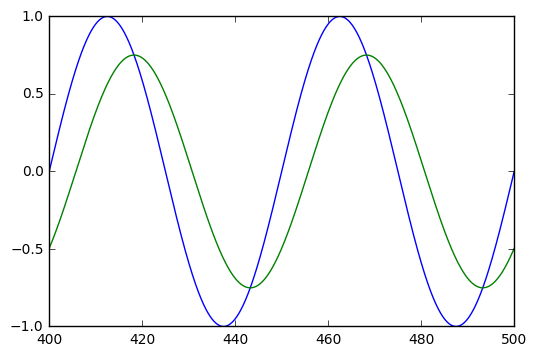

In [31]:
plot(T[t0:],Y[t0:],T_[t0:],Y_[t0:])

In [32]:
from scipy.optimize import minimize, rosen, rosen_der

In [33]:
np.sum((np.array([0,1,2])- np.array([0.5,1.5,0.5]))**2)

2.75

In [34]:
def func(T, A, Phase):
    return A*np.sin(w*T+Phase)

import scipy.optimize as optimization

In [35]:
x0 = [1, 0]

In [36]:
xdata=T_[t0:]-T_[t0]
ydata=Y_[t0:]

In [37]:
(Gain, Phase), B = optimization.curve_fit(func, xdata, ydata, x0)

In [38]:
Gain

0.75084524547878939

In [39]:
Phase

-0.72145527964598755

In [40]:
plot(xdata,ydata,xdata, func(xdata,A[0],A[1]))

NameError: name 'A' is not defined

In [ ]:
?control.matlab.bode

In [ ]:
?signal.bode

In [ ]:
f

In [ ]:
# w : 1D ndarray
#     Frequency array [rad/s]
# mag : 1D ndarray
#     Magnitude array [dB]
# phase : 1D ndarray
#     Phase array [deg]
w, mag, phase = signal.bode(sys2, w)

In [ ]:
mag

In [ ]:
20*np.log10(A[0])